In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


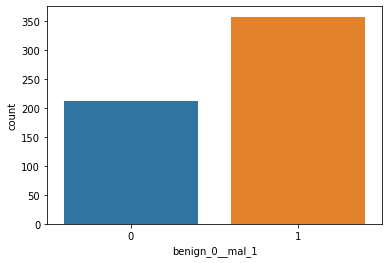

In [6]:
sns.countplot(x = 'benign_0__mal_1', data = df)

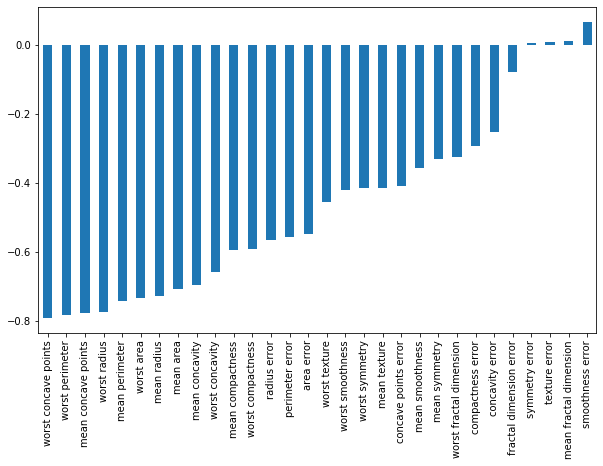

In [13]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

In [14]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [25]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 4s 8ms/sample - loss: 0.6459 - accuracy: 0.7653 - val_loss: 0.6369 - val_accuracy: 0.8531
Epoch 2/600
426/426 [==============================] - 0s 553us/sample - loss: 0.6135 - accuracy: 0.8498 - val_loss: 0.6040 - val_accuracy: 0.8462
Epoch 3/600
426/426 [==============================] - 0s 483us/sample - loss: 0.5775 - accuracy: 0.8826 - val_loss: 0.5651 - val_accuracy: 0.9021
Epoch 4/600
426/426 [==============================] - 0s 515us/sample - loss: 0.5371 - accuracy: 0.8897 - val_loss: 0.5211 - val_accuracy: 0.9091
Epoch 5/600
426/426 [==============================] - 0s 583us/sample - loss: 0.4915 - accuracy: 0.8920 - val_loss: 0.4694 - val_accuracy: 0.9161
Epoch 6/600
426/426 [==============================] - 0s 675us/sample - loss: 0.4420 - accuracy: 0.9038 - val_loss: 0.4210 - val_accuracy: 0.9231
Epoch 7/600
426/426 [==============================] - 0s 462us/sample - l

426/426 [==============================] - 0s 168us/sample - loss: 0.0593 - accuracy: 0.9859 - val_loss: 0.1000 - val_accuracy: 0.9790
Epoch 57/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0605 - accuracy: 0.9836 - val_loss: 0.1005 - val_accuracy: 0.9790
Epoch 58/600
426/426 [==============================] - 0s 250us/sample - loss: 0.0614 - accuracy: 0.9789 - val_loss: 0.1025 - val_accuracy: 0.9790
Epoch 59/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0585 - accuracy: 0.9836 - val_loss: 0.1031 - val_accuracy: 0.9790
Epoch 60/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0581 - accuracy: 0.9836 - val_loss: 0.0988 - val_accuracy: 0.9790
Epoch 61/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0568 - accuracy: 0.9859 - val_loss: 0.0985 - val_accuracy: 0.9790
Epoch 62/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.0981 

426/426 [==============================] - 0s 159us/sample - loss: 0.0436 - accuracy: 0.9836 - val_loss: 0.1086 - val_accuracy: 0.9720
Epoch 112/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.1046 - val_accuracy: 0.9790
Epoch 113/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0438 - accuracy: 0.9836 - val_loss: 0.1110 - val_accuracy: 0.9790
Epoch 114/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.1015 - val_accuracy: 0.9860
Epoch 115/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0462 - accuracy: 0.9789 - val_loss: 0.1175 - val_accuracy: 0.9720
Epoch 116/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0425 - accuracy: 0.9859 - val_loss: 0.1026 - val_accuracy: 0.9790
Epoch 117/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0

426/426 [==============================] - 0s 275us/sample - loss: 0.0350 - accuracy: 0.9859 - val_loss: 0.1122 - val_accuracy: 0.9790
Epoch 167/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0349 - accuracy: 0.9859 - val_loss: 0.1183 - val_accuracy: 0.9790
Epoch 168/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0356 - accuracy: 0.9859 - val_loss: 0.1137 - val_accuracy: 0.9790
Epoch 169/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0334 - accuracy: 0.9859 - val_loss: 0.1223 - val_accuracy: 0.9790
Epoch 170/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0372 - accuracy: 0.9836 - val_loss: 0.1302 - val_accuracy: 0.9720
Epoch 171/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0338 - accuracy: 0.9859 - val_loss: 0.1191 - val_accuracy: 0.9790
Epoch 172/600
426/426 [==============================] - 0s 331us/sample - loss: 0.0365 - accuracy: 0.9859 - val_loss: 0

426/426 [==============================] - 0s 192us/sample - loss: 0.0284 - accuracy: 0.9883 - val_loss: 0.1218 - val_accuracy: 0.9860
Epoch 222/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0269 - accuracy: 0.9859 - val_loss: 0.1489 - val_accuracy: 0.9720
Epoch 223/600
426/426 [==============================] - 0s 256us/sample - loss: 0.0272 - accuracy: 0.9930 - val_loss: 0.1187 - val_accuracy: 0.9930
Epoch 224/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0287 - accuracy: 0.9883 - val_loss: 0.1342 - val_accuracy: 0.9790
Epoch 225/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0257 - accuracy: 0.9883 - val_loss: 0.1283 - val_accuracy: 0.9790
Epoch 226/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0259 - accuracy: 0.9883 - val_loss: 0.1367 - val_accuracy: 0.9790
Epoch 227/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0254 - accuracy: 0.9883 - val_loss: 0

Epoch 276/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.1430 - val_accuracy: 0.9790
Epoch 277/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.1384 - val_accuracy: 0.9860
Epoch 278/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0231 - accuracy: 0.9906 - val_loss: 0.1430 - val_accuracy: 0.9790
Epoch 279/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.1355 - val_accuracy: 0.9860
Epoch 280/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0236 - accuracy: 0.9883 - val_loss: 0.1526 - val_accuracy: 0.9720
Epoch 281/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0246 - accuracy: 0.9906 - val_loss: 0.1490 - val_accuracy: 0.9720
Epoch 282/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0200 - accuracy: 0.9883

Epoch 331/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.1541 - val_accuracy: 0.9720
Epoch 332/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0191 - accuracy: 0.9953 - val_loss: 0.1433 - val_accuracy: 0.9860
Epoch 333/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0178 - accuracy: 0.9930 - val_loss: 0.1517 - val_accuracy: 0.9790
Epoch 334/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0169 - accuracy: 0.9977 - val_loss: 0.1514 - val_accuracy: 0.9790
Epoch 335/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.1522 - val_accuracy: 0.9790
Epoch 336/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.1494 - val_accuracy: 0.9790
Epoch 337/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0194 - accuracy: 0.9906

Epoch 386/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0125 - accuracy: 0.9977 - val_loss: 0.1613 - val_accuracy: 0.9790
Epoch 387/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.1757 - val_accuracy: 0.9720
Epoch 388/600
426/426 [==============================] - 0s 197us/sample - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.1704 - val_accuracy: 0.9790
Epoch 389/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0144 - accuracy: 0.9930 - val_loss: 0.1624 - val_accuracy: 0.9790
Epoch 390/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.1633 - val_accuracy: 0.9790
Epoch 391/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0131 - accuracy: 0.9977 - val_loss: 0.1700 - val_accuracy: 0.9790
Epoch 392/600
426/426 [==============================] - 0s 226us/sample - loss: 0.0145 - accuracy: 0.9977

Epoch 441/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0134 - accuracy: 0.9953 - val_loss: 0.1632 - val_accuracy: 0.9860
Epoch 442/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0131 - accuracy: 0.9930 - val_loss: 0.1777 - val_accuracy: 0.9790
Epoch 443/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.1900 - val_accuracy: 0.9790
Epoch 444/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.1626 - val_accuracy: 0.9860
Epoch 445/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0103 - accuracy: 0.9953 - val_loss: 0.1941 - val_accuracy: 0.9720
Epoch 446/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9790
Epoch 447/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0089 - accuracy: 0.9977

Epoch 496/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1881 - val_accuracy: 0.9790
Epoch 497/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9790
Epoch 498/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2060 - val_accuracy: 0.9720
Epoch 499/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1888 - val_accuracy: 0.9790
Epoch 500/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.2168 - val_accuracy: 0.9580
Epoch 501/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1823 - val_accuracy: 0.9790
Epoch 502/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0068 - accuracy: 1.0000

Epoch 551/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.2055 - val_accuracy: 0.9790
Epoch 552/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.2950 - val_accuracy: 0.9371
Epoch 553/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0088 - accuracy: 0.9953 - val_loss: 0.1974 - val_accuracy: 0.9790
Epoch 554/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2239 - val_accuracy: 0.9720
Epoch 555/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2287 - val_accuracy: 0.9650
Epoch 556/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2080 - val_accuracy: 0.9720
Epoch 557/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0049 - accuracy: 1.0000

In [28]:
losses = pd.DataFrame(model.history.history)[['loss', 'val_loss']]

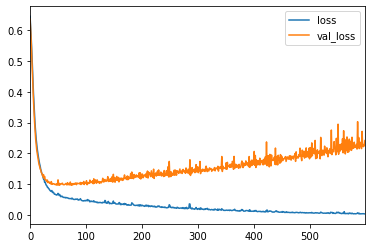

In [29]:
losses.plot()

In [30]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# help(EarlyStopping)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [33]:
model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), 
          callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6949 - accuracy: 0.5610 - val_loss: 0.6845 - val_accuracy: 0.6014
Epoch 2/600
426/426 [==============================] - 0s 332us/sample - loss: 0.6653 - accuracy: 0.6385 - val_loss: 0.6577 - val_accuracy: 0.6643
Epoch 3/600
426/426 [==============================] - 0s 334us/sample - loss: 0.6365 - accuracy: 0.7277 - val_loss: 0.6293 - val_accuracy: 0.7622
Epoch 4/600
426/426 [==============================] - 0s 527us/sample - loss: 0.6065 - accuracy: 0.7371 - val_loss: 0.5973 - val_accuracy: 0.7692
Epoch 5/600
426/426 [==============================] - 0s 294us/sample - loss: 0.5730 - accuracy: 0.7488 - val_loss: 0.5608 - val_accuracy: 0.8182
Epoch 6/600
426/426 [==============================] - 0s 266us/sample - loss: 0.5345 - accuracy: 0.8286 - val_loss: 0.5213 - val_accuracy: 0.8462
Epoch 7/600
426/426 [==============================] - 0s 399us/sample - l

426/426 [==============================] - 0s 171us/sample - loss: 0.0616 - accuracy: 0.9836 - val_loss: 0.1205 - val_accuracy: 0.9650
Epoch 57/600
426/426 [==============================] - 0s 259us/sample - loss: 0.0671 - accuracy: 0.9812 - val_loss: 0.1205 - val_accuracy: 0.9650
Epoch 58/600
426/426 [==============================] - 0s 388us/sample - loss: 0.0612 - accuracy: 0.9765 - val_loss: 0.1199 - val_accuracy: 0.9650
Epoch 59/600
426/426 [==============================] - 0s 305us/sample - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.1214 - val_accuracy: 0.9720
Epoch 60/600
426/426 [==============================] - 0s 464us/sample - loss: 0.0653 - accuracy: 0.9812 - val_loss: 0.1262 - val_accuracy: 0.9720
Epoch 61/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0578 - accuracy: 0.9836 - val_loss: 0.1187 - val_accuracy: 0.9650
Epoch 62/600
426/426 [==============================] - 0s 351us/sample - loss: 0.0581 - accuracy: 0.9836 - val_loss: 0.1267 

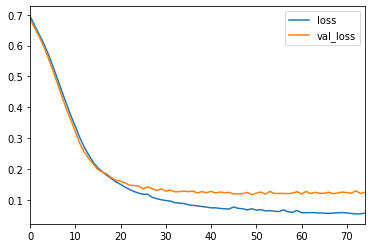

In [36]:
losses = pd.DataFrame(model.history.history)[['loss', 'val_loss']]
losses.plot()

In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

# rate = 0, means 0% of neurons are going to be turned off randomly, for each batch
# of training

model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

model.fit(x = X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), 
          callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6874 - accuracy: 0.6362 - val_loss: 0.6775 - val_accuracy: 0.6154
Epoch 2/600
426/426 [==============================] - 0s 274us/sample - loss: 0.6898 - accuracy: 0.6338 - val_loss: 0.6530 - val_accuracy: 0.6154
Epoch 3/600
426/426 [==============================] - 0s 274us/sample - loss: 0.6653 - accuracy: 0.6408 - val_loss: 0.6288 - val_accuracy: 0.7483
Epoch 4/600
426/426 [==============================] - 0s 276us/sample - loss: 0.6257 - accuracy: 0.6995 - val_loss: 0.6010 - val_accuracy: 0.8671
Epoch 5/600
426/426 [==============================] - 0s 271us/sample - loss: 0.6232 - accuracy: 0.6878 - val_loss: 0.5726 - val_accuracy: 0.8671
Epoch 6/600
426/426 [==============================] - 0s 279us/sample - loss: 0.5953 - accuracy: 0.7207 - val_loss: 0.5435 - val_accuracy: 0.8671
Epoch 7/600
426/426 [==============================] - 0s 273us/sample - l

Epoch 56/600
426/426 [==============================] - 0s 310us/sample - loss: 0.1768 - accuracy: 0.9366 - val_loss: 0.1207 - val_accuracy: 0.9580
Epoch 57/600
426/426 [==============================] - 0s 212us/sample - loss: 0.1342 - accuracy: 0.9484 - val_loss: 0.1141 - val_accuracy: 0.9510
Epoch 58/600
426/426 [==============================] - 0s 195us/sample - loss: 0.1361 - accuracy: 0.9554 - val_loss: 0.1197 - val_accuracy: 0.9580
Epoch 59/600
426/426 [==============================] - 0s 229us/sample - loss: 0.1505 - accuracy: 0.9413 - val_loss: 0.1107 - val_accuracy: 0.9580
Epoch 60/600
426/426 [==============================] - 0s 316us/sample - loss: 0.1526 - accuracy: 0.9437 - val_loss: 0.1119 - val_accuracy: 0.9510
Epoch 61/600
426/426 [==============================] - 0s 229us/sample - loss: 0.1471 - accuracy: 0.9507 - val_loss: 0.1262 - val_accuracy: 0.9580
Epoch 62/600
426/426 [==============================] - 0s 198us/sample - loss: 0.1543 - accuracy: 0.9484 - val_

Epoch 111/600
426/426 [==============================] - 0s 286us/sample - loss: 0.0749 - accuracy: 0.9671 - val_loss: 0.1023 - val_accuracy: 0.9720
Epoch 112/600
426/426 [==============================] - 0s 271us/sample - loss: 0.1066 - accuracy: 0.9531 - val_loss: 0.0989 - val_accuracy: 0.9720
Epoch 113/600
426/426 [==============================] - 0s 267us/sample - loss: 0.1019 - accuracy: 0.9648 - val_loss: 0.1015 - val_accuracy: 0.9790
Epoch 114/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0866 - accuracy: 0.9695 - val_loss: 0.1145 - val_accuracy: 0.9650
Epoch 115/600
426/426 [==============================] - 0s 362us/sample - loss: 0.0910 - accuracy: 0.9671 - val_loss: 0.1005 - val_accuracy: 0.9720
Epoch 116/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0963 - accuracy: 0.9765 - val_loss: 0.1134 - val_accuracy: 0.9720
Epoch 117/600
426/426 [==============================] - 0s 245us/sample - loss: 0.0855 - accuracy: 0.9742

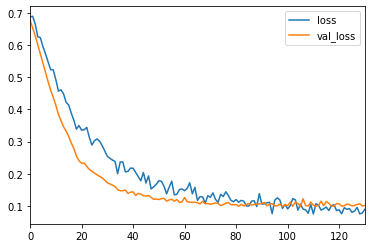

In [42]:
losses = pd.DataFrame(model.history.history)[['loss', 'val_loss']]
losses.plot()

In [43]:
# In case of Classification (Classes)

predictions = model.predict_classes(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

